# Importing Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)
batch_size = 64

In [3]:
train_path = '../input/apple-only/AppleOnly'

In [4]:
train_aug = ImageDataGenerator(
    rescale=1/255.0,
    fill_mode="nearest",
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
)
train_data = train_aug.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='input'
)

Found 10148 images belonging to 4 classes.


# Encoder and Decoder Architecture

In [5]:
model = keras.models.Sequential([
    #ENCODER
        keras.layers.Reshape(input_shape, input_shape=input_shape),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, kernel_size=3, padding="same", activation="selu"),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(256, kernel_size=3, padding="same", activation="selu"),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
        keras.layers.MaxPool2D(pool_size=2),
    
    #DECODER
        keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same",activation="selu"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="same",activation="selu"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding="same",activation="selu"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="same",activation="selu"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2DTranspose(3, kernel_size=3, strides=2, padding="same",activation="sigmoid"),
        keras.layers.Reshape(input_shape)

    ])

2022-06-22 15:28:25.154750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 15:28:25.293274: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 15:28:25.294057: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 15:28:25.295342: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [10]:
no_of_epochs = 1000
history = model.fit(
        train_data,
        steps_per_epoch= no_of_epochs // batch_size,
        epochs = 1000,
        shuffle = True)

2022-06-22 15:28:29.753792: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000


2022-06-22 15:28:33.056119: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


15/15 [==============================] - 27s 1s/step - loss: 0.0346 - mse: 0.0346
Epoch 2/1000
15/15 [==============================] - 19s 1s/step - loss: 0.0144 - mse: 0.0144
Epoch 3/1000
15/15 [==============================] - 18s 1s/step - loss: 0.0114 - mse: 0.0114
Epoch 4/1000
15/15 [==============================] - 18s 1s/step - loss: 0.0094 - mse: 0.0094
Epoch 5/1000
15/15 [==============================] - 17s 1s/step - loss: 0.0083 - mse: 0.0083
Epoch 6/1000
15/15 [==============================] - 17s 1s/step - loss: 0.0077 - mse: 0.0077
Epoch 7/1000
15/15 [==============================] - 16s 1s/step - loss: 0.0074 - mse: 0.0074
Epoch 8/1000
15/15 [==============================] - 16s 1s/step - loss: 0.0071 - mse: 0.0071
Epoch 9/1000
15/15 [==============================] - 16s 1s/step - loss: 0.0070 - mse: 0.0070
Epoch 10/1000
15/15 [==============================] - 15s 1s/step - loss: 0.0067 - mse: 0.0067
Epoch 11/1000
15/15 [==============================] - 15s 1s/

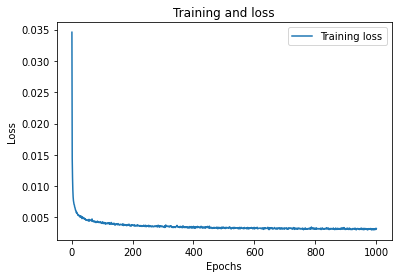

In [11]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.title('Training and loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model.save("MaizeAnomaly.h5")

In [18]:
def showReconstruction(img_path):
    img  = Image.open(img_path)
    img = np.array(img.resize((224,224), Image.ANTIALIAS))
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    reconstruction = model.predict([[img]])
    plt.subplot(122)
    plt.imshow(reconstruction[0])
    plt.show()

In [19]:
def check_anomaly(img_path):
    showReconstruction(img_path)
    # Setting Threshold
    reconstruction_error_threshold = 0.0035
    img  = Image.open(img_path)
    img = np.array(img.resize((224,224), Image.ANTIALIAS))
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")  
    else:
        print("The image is NOT an anomaly")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


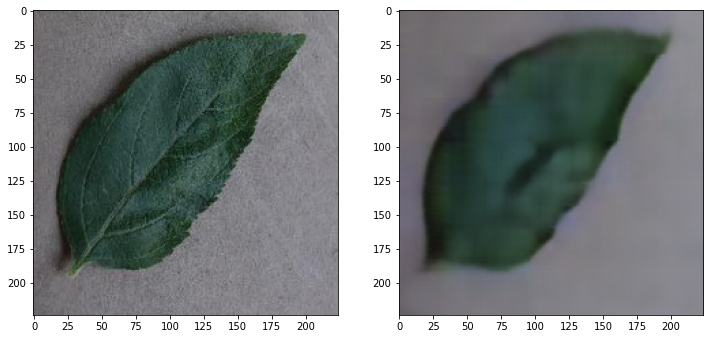

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  """


1/1 [==============================] - 0s 272ms/step - loss: 0.0022 - mse: 0.0022
The image is NOT an anomaly


In [20]:
import glob
file_path = glob.glob('../input/apple-only/AppleOnly/Apple___healthy/0460b7aa-4eb0-4c0b-80e5-055ced6684a3___RS_HL 6287_90degFlipLR.JPG')
check_anomaly(file_path[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


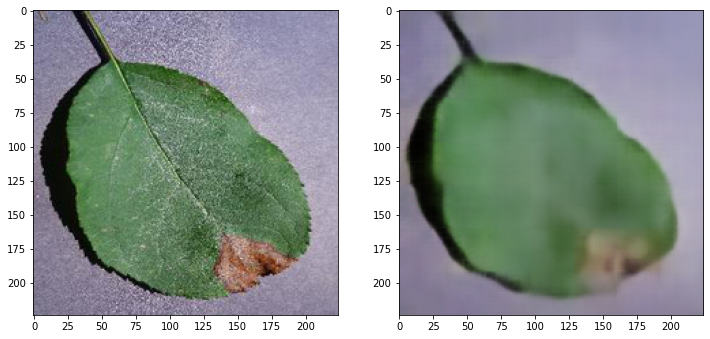

1/1 [==============================] - 0s 17ms/step - loss: 0.0056 - mse: 0.0056
The image is an anomaly


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  """


In [21]:
import glob
file_path = glob.glob('../input/apple-only/AppleOnly/Apple___Black_rot/0139bc6d-391c-4fd1-bcae-cc74dabfddd7___JR_FrgE.S 2734_FlipTB.JPG')
check_anomaly(file_path[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


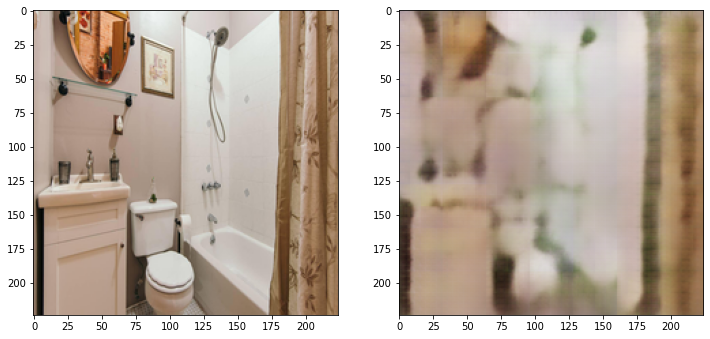

1/1 [==============================] - 0s 16ms/step - loss: 0.0101 - mse: 0.0101
The image is an anomaly


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  """


In [22]:
import glob
file_path = glob.glob('../input/airbnb-duplicate-image-detection/Airbnb Data/Test Data/bathroom/berlin_17339881_1.jpg')
check_anomaly(file_path[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


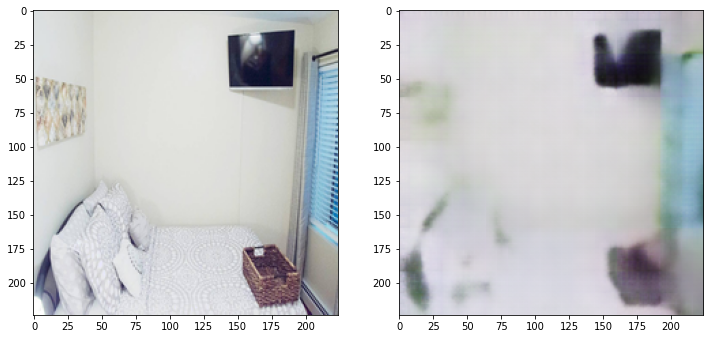

1/1 [==============================] - 0s 17ms/step - loss: 0.0056 - mse: 0.0056
The image is an anomaly


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  """


In [23]:
import glob
file_path = glob.glob('../input/airbnb-duplicate-image-detection/Airbnb Data/Test Data/bedroom/berlin_1497024_1.jpg')
check_anomaly(file_path[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


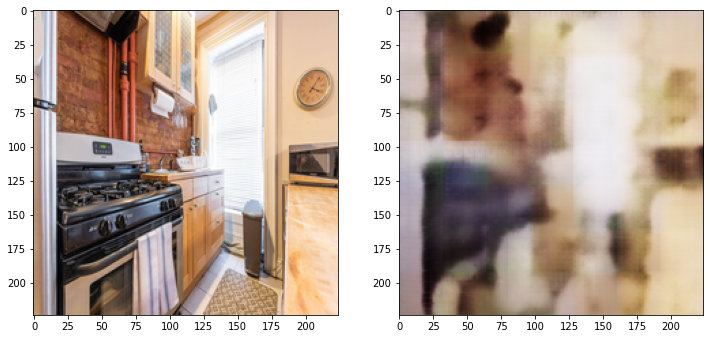

1/1 [==============================] - 0s 17ms/step - loss: 0.0191 - mse: 0.0191
The image is an anomaly


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  """


In [24]:
import glob
file_path = glob.glob('../input/airbnb-duplicate-image-detection/Airbnb Data/Test Data/kitchen/berlin_1583556_2.jpg')
check_anomaly(file_path[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


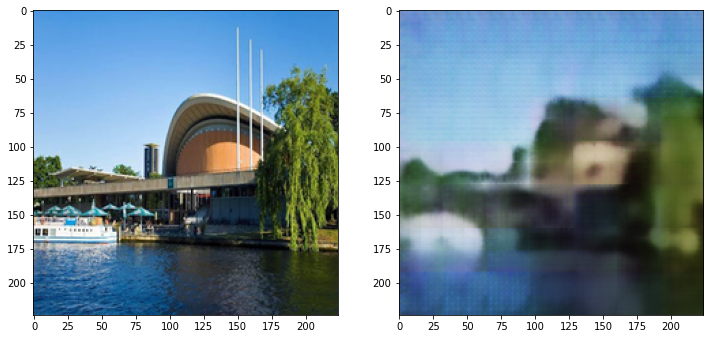

1/1 [==============================] - 0s 17ms/step - loss: 0.0171 - mse: 0.0171
The image is an anomaly


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  """


In [25]:
import glob
file_path = glob.glob('../input/airbnb-duplicate-image-detection/Airbnb Data/Test Data/outdoor/berlin_33043_2.jpg')
check_anomaly(file_path[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


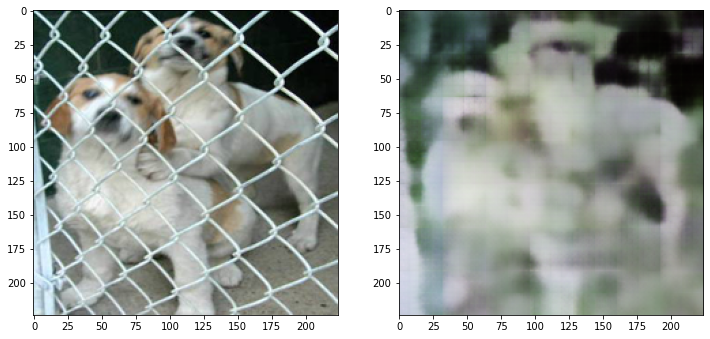

1/1 [==============================] - 0s 16ms/step - loss: 0.0291 - mse: 0.0291
The image is an anomaly


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  """


In [26]:
import glob
file_path = glob.glob('../input/cat-and-dog/test_set/test_set/dogs/dog.4008.jpg')
check_anomaly(file_path[0])